<h1 style="text-align:center;">Méthodes d'Analyse de Régression dans R</h1>

<u>**Auteur</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table de matières</h3>

<font color="purple" size=+1><b>[0. Introduction](#0)</b></font>    
<font color="purple" size=+1><b>[1. Régression Linéaire](#01)</b></font>
* [1.1 Motivation](#1)
* [1.2 Méthodologie](#2)
* [1.3 Prédicteurs continus](#3)
* [1.4 Prédicteurs catégoriques](#4)
* [1.5 Diagnostics](#5)
* [1.6 ANOVA et ANCOVA](#6)
    
<font color="purple" size=+1><b>[2. Régression Logistique](#02)</b></font>

# Enregistrement 

| Date (YYYY-MM-DD) | Version | Changé Par      | Description du Changement |
| ----------------- | ------- | -------------   | ----------------------- |
| 2024-05-08       | 1.0     | Younes Dahami   |  version initiale|
| 2024-05-13       | 1.1     | Younes Dahami   |  ANOVA/ANCOVA |

Voir aussi :

* [Les Tableaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Tableaux%20en%20R)

* [Les Concepts Statistiques Fondamentaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Les%20Concepts%20Statistiques%20Fondamentaux%20dans%20R)

* [ggplot2](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/ggplot2)

<a id="0"></a>
# Introduction

Les méthodes de régression constituent l'ossature de nombreuses analyses en recherche. En général, ces méthodes sont utilisées pour estimer les associations entre les variables, notamment lorsque l'une ou plusieurs de ces variables sont continues. Dans ce sujet, nous couvrons la **régression linéaire**, la **régression logistique** et les **modèles mixtes.** Pour la plupart des personnes, la compréhension de ces méthodes sera suffisante pour les analyses requises dans leur recherche. Étant donné que ces méthodes sont si souvent utilisées, elles sont couvertes en détail. La motivation statistique derrière ces méthodes et leur implémentation dans R sur des données sont toutes deux couvertes, et comprendre ces deux concepts est essentiel lors de la réalisation de nos analyses. De plus, la terminologie est introduite pour aider à normaliser le langage utilisé avec ces concepts à travers le réseau IBIS (Infant Brain Imaging Study). L'ensemble des données transversales est utilisé pour illustrer ces concepts tout au long de ce notebook.


In [37]:
library(ggplot2)
library(tidyverse)

In [38]:
data_complete <- read.csv("Cross-sec_full.csv", stringsAsFactors = FALSE, na.strings = c(" ", "","."))
head(data_complete)

,Identifiers,SSM_ASD_v24,V24.demographics.Risk,GROUP,Study_Site,Gender,V06.aosi.Candidate_Age,V12.aosi.Candidate_Age,V06.aosi.total_score_1_18,V12.aosi.total_score_1_18,⋯,V06.mullen.Candidate_Age,V12.mullen.Candidate_Age,V36.mullen.cognitive_t_score_sum,V24.mullen.cognitive_t_score_sum,V06.mullen.cognitive_t_score_sum,V12.mullen.cognitive_t_score_sum,V36.mullen.composite_standard_score,V24.mullen.composite_standard_score,V06.mullen.composite_standard_score,V12.mullen.composite_standard_score
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,YES_ASD,HR,HR_ASD,PHI,Male,7.1,12.5,8,3,⋯,7.1,12.5,153,123,179,172,77,65,90,86
2,2,YES_ASD,HR,HR_ASD,PHI,Male,6.1,12.4,18,10,⋯,6.1,12.4,110,124,170,124,59,65,85,65
3,3,YES_ASD,HR,HR_ASD,PHI,Male,6.6,12.9,4,2,⋯,6.6,12.9,117,134,183,219,62,69,92,110
4,4,YES_ASD,HR,HR_ASD,PHI,Male,NA,12.7,NA,3,⋯,NA,12.7,152,107,NA,219,77,58,NA,110
5,5,NO_ASD,HR,HR_neg,PHI,Male,6.8,NA,6,NA,⋯,6.8,NA,226,173,226,NA,113,87,113,NA
6,6,NO_ASD,HR,HR_neg,PHI,Male,NA,12.1,NA,4,⋯,NA,12.1,184,196,NA,155,92,98,NA,78


In [39]:
colnames(data_complete)

[1] "Identifiers"                         "SSM_ASD_v24"                        
 [3] "V24.demographics.Risk"               "GROUP"                              
 [5] "Study_Site"                          "Gender"                             
 [7] "V06.aosi.Candidate_Age"              "V12.aosi.Candidate_Age"             
 [9] "V06.aosi.total_score_1_18"           "V12.aosi.total_score_1_18"          
[11] "V36.mullen.Candidate_Age"            "V24.mullen.Candidate_Age"           
[13] "V06.mullen.Candidate_Age"            "V12.mullen.Candidate_Age"           
[15] "V36.mullen.cognitive_t_score_sum"    "V24.mullen.cognitive_t_score_sum"   
[17] "V06.mullen.cognitive_t_score_sum"    "V12.mullen.cognitive_t_score_sum"   
[19] "V36.mullen.composite_standard_score" "V24.mullen.composite_standard_score"
[21] "V06.mullen.composite_standard_score" "V12.mullen.composite_standard_score"

<a id="01"></a>
# 1) Régression Linéaire

<a id="1"></a>
## 1.1) Motivation

Supposons que nous nous intéressions à l'association entre le score composite Mullen (enregistré comme un score standard dans l'ensemble de données) et la sévérité de l'autisme telle que mesurée par l'AOSI, chez les enfants à 12 mois `V12.mullen.composite_standard_score` et `V12.aosi.total_score_1_18`. Étant donné que les deux sont des variables continues, une mesure simple de cette association est leur corrélation. Regardons le graphique de dispersion pour ces deux variables.


Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


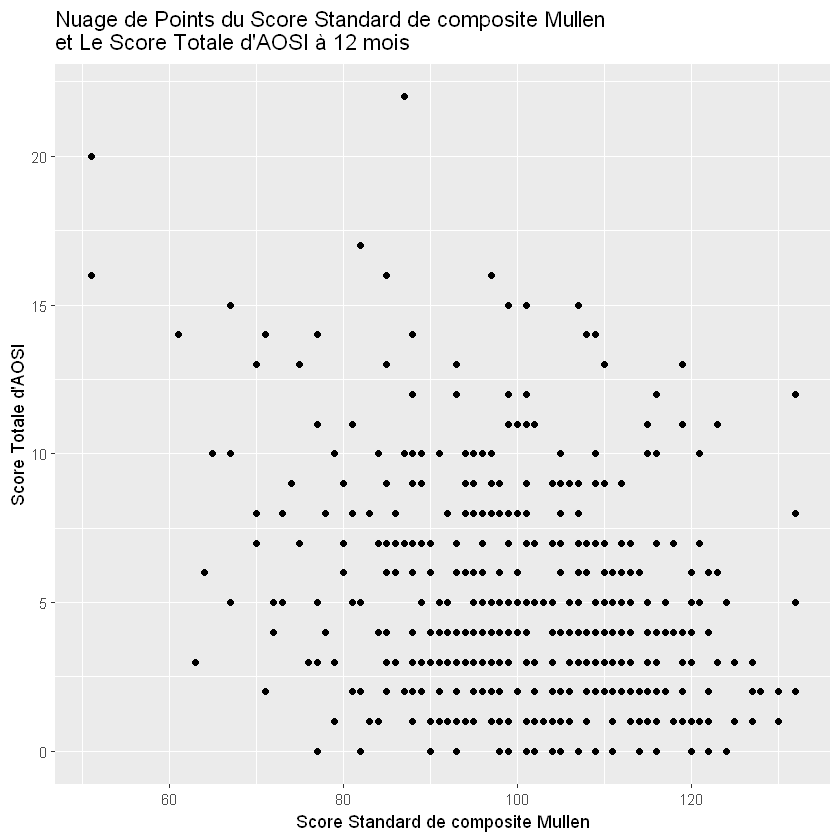

In [40]:
ggplot(data = data_complete, aes(x= V12.mullen.composite_standard_score, y=V12.aosi.total_score_1_18))+
    geom_point()+
    labs(x="Score Standard de composite Mullen",
         y= "Score Totale d'AOSI",
         title = "Nuage de Points du Score Standard de composite Mullen \net Le Score Totale d'AOSI à 12 mois")

`\n` est utilisé lors de la spécification du titre. Si cela n'est pas inclus, R forcera l'ensemble de la chaine sur une seule ligne, coupant une partie du titre en raison du manque d'espace. Ajouter `\n` force un saut de ligne à cet endroit. Cette chaine `\n` spécifie une nouvelle ligne pour n'importe quelle chaine générale (elle peut être utilisée avec les étiquettes des axes, le titre de la légende, les légendes ou sous-titres, etc.).


Au mieux, il semble y avoir une relation faible et négative entre ces variables.

Estimons la **corrélation.** Cela peut être fait en R en utilisant **`cor()`.** Remarquons que `cor()` n'a pas d'argument `data=`, donc nous devons spécifier les variables d'intérêt sous la forme `dataset$variable`. De plus, par défaut, si l'une des variables comporte des valeurs manquantes, un NA est renvoyé par `cor()`. Pour exclure tout sujet dont une ou plusieurs des variables manquent du calcul, spécifions **`use="pairwise.complete"`** comme argument dans la fonction. Nous pouvons également :

**1)** mener un test d'hypothèse formel pour une corrélation nulle

**2)** calculer un intervalle de confiance à $95\%$ pour la corrélation en utilisant la fonction **`cor.test()`.**

Remarquons que la mesure de corrélation par défaut est **Pearson,** bien que cela puisse être modifié dans les deux fonctions en utilisant l'argument **`measure=`**. De plus, lors de la réalisation du test d'hypothèse ou du calcul de l'intervalle de confiance, nous devons toujours prendre en compte toutes les hypothèses de distribution qui sont utilisées dans ces calculs (comme discuté dans [Les Tableaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Tableaux%20en%20R) et [Les Concepts Statistiques Fondamentaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Les%20Concepts%20Statistiques%20Fondamentaux%20dans%20R)).

Pour que le test d'hypothèse et les calculs de l'intervalle de confiance effectués ici soient valides, l'une des conditions (assumptions) suivantes doit être remplie :

**1)** les deux variables sont conjointement distribuées normalement.

**2)** ou bien la taille de l'échantillon est suffisamment grande pour que la distribution approximative de la statistique de test soit précise. Cette distribution approximative est une distribution $t$ avec $n-2$ degrés de liberté, où $n$ représente la taille de l'échantillon. Par conséquent, la valeur de la statistique de test dans la sortie R est notée $t.$


In [41]:
cor(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18)

[1] NA

In [42]:
cor(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18,
   use = "pairwise.complete")

[1] -0.2964536

In [43]:
# effectuons un test d'hypothèse
resultats <- cor.test(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18)
resultats


	Pearson's product-moment correlation

data:  data_complete$V12.mullen.composite_standard_score and data_complete$V12.aosi.total_score_1_18
t = -7.01, df = 510, p-value = 7.59e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3735142 -0.2153293
sample estimates:
       cor 
-0.2964536 


Nous constatons qu'il y a des preuves (p-value = 7.59e-12 < 0.05) d'une corrélation modérée et négative entre ces variables.

Cependant, l'utilisation de cette corrélation par paire présente ses limites car :

**1)** c'est une mesure plus "générale"

**2)** elle ne tient pas compte d'autres variables qui pourraient influencer cette association.

Pour mieux illustrer le premier point, considérons les diagrammes de dispersion suivants (créés à l'aide de données simulées).


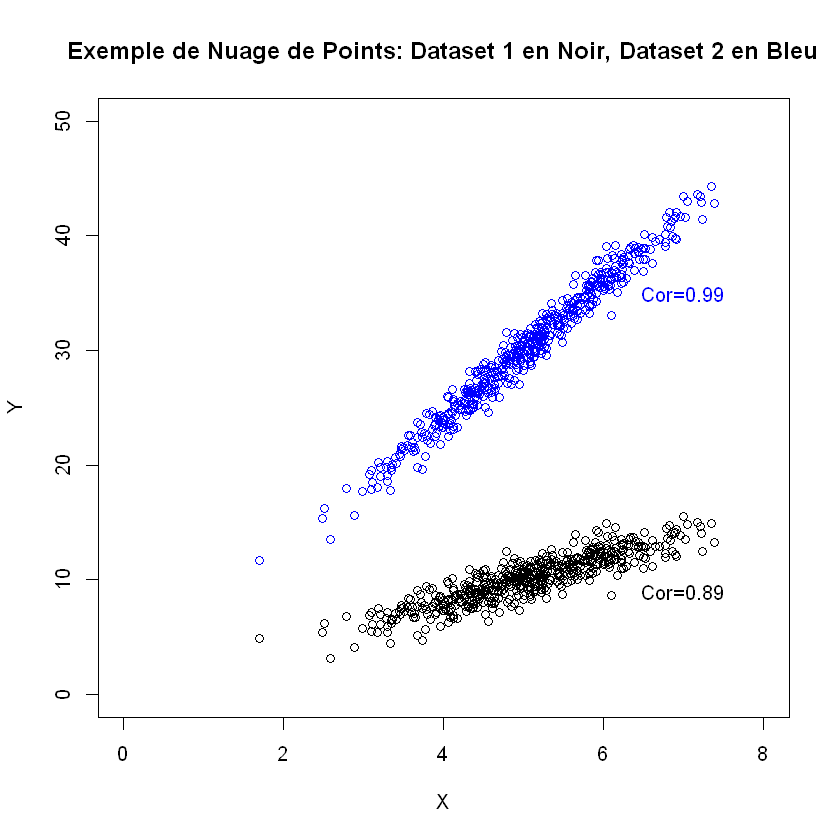

In [44]:
# simuler les données
set.seed(25101989)
E <- rnorm(500)
X <- rnorm(500, mean=5)
Y1 <- 2*X+E
Y2 <- 6*X+E

# nous utiliserons les fonctions de tracé par défaut de R (plot)
plot(X, Y1, main="Exemple de Nuage de Points: Dataset 1 en Noir, Dataset 2 en Bleu", xlim = c(0, 8), ylim=c(0, 50), ylab="Y")
points(X, Y2, col="blue")
text(x=7, y=9,labels=paste("Cor=",round(cor(X, Y1),2),sep=""))
text(x=7, y=35,labels=paste("Cor=",round(cor(X, Y2),2),sep=""), col="blue")

In [45]:
cor(X, Y1)

[1] 0.885667

In [46]:
cor(X, Y2)

[1] 0.9854266

Nous pouvons voir que les deux exemples ont une corrélation similaire, bien que l'ensemble de données représenté en bleu ait une augmentation beaucoup plus importante de la variable $Y$ lorsque la variable $X$ augmente. Il serait utile de mesurer plus explicitement ces **pentes** et d'ajuster cette mesure en fonction d'autres variables d'intérêt qui pourraient influencer l'association.


<a id="2"></a>
## 1.2) Méthodologie

### 1.2.1) Aperçu

Supposons que les variables $X$ et $Y$ sont d'intérêt, où $Y$ est **continue** ($X$ peut être discrète ou continue). Avec la régression linéaire, nous spécifions le modèle suivant entre ces variables : 

$$Y=\beta_0+\beta_1X+\varepsilon$$

Où 

* $\epsilon$ est généralement considéré comme le **terme d'erreur** du modèle que nous supposons avoir ici une moyenne nulle et une variance notée $\sigma^2$.

Pour les variables $X$ et $Y$, dénotons la moyenne de $Y$ conditionnelle à $X$ par $\mathbb{E}(Y|X)$. Avec la régression linéaire, puisque la moyenne de $\varepsilon$ est de 0 :

$$\mathbb{E}(Y|X)=\beta_0+\beta_1X$$

qui est une fonction *linéaire* de $X$. Lorsque nous appliquons ce modèle aux données, nous supposons que $\varepsilon$ de chaque observation est indépendant, ce qui implique que la valeur $Y$ de chaque observation est indépendante car $Y$ est une fonction de $\varepsilon$. En conséquence, pour les données où il y a plusieurs observations par sujet, le modèle de régression linéaire ne serait pas valide et son application ne produirait pas de résultats valides.

Nous voyons que $\beta_0$ (l'intercept) représente la moyenne de $Y$ lorsque $X$ est 0 et $\beta_1$ (la pente) représente le changement de moyenne de $Y$ lorsque $X$ augmente de 1. Sur la base de ce modèle, nous voulons **estimer les paramètres** $\beta_0$ et $\beta_1$ avec la pente servant de mesure de l'association entre $X$ et $Y$. Nous notons les estimations avec $\hat{\beta_0}$ et $\hat{\beta_1}$ respectivement. Cela se fait généralement en utilisant une **estimation par les moindres carrés** (least squares estimation).

Puisque les estimations de l'intercept et de la pente varieront d'un échantillon à un autre dans une population donnée, nous aimerions prendre en compte cette aléa. Cela se fait généralement en effectuant un test d'hypothèse et/ou en calculant un intervalle de confiance.

En régression linéaire, les méthodes standard pour calculer une valeur $p$ à partir d'un test d'hypothèse ou d'un intervalle de confiance nécessitent que l'une des deux hypothèses (assumptions) suivantes soit vraie :

**1)** $\varepsilon$ est distribué normalement

ou

**2)** la taille de l'échantillon est suffisamment grande pour que nos estimations d'intercept et de pente ($\hat{\beta}_0$ et $\hat{\beta}_1$ respectivement) soient approximativement distribuées normalement.

Si l'une de ces conditions est remplie, la statistique de test suit (approximativement si une approximation pour un grand échantillon est utilisée) une distribution de Student (t-distribution) avec $n-p$ **degrés de liberté** où $p$ désigne le nombre de paramètres dans le modèle ($p=2$ dans ce cas). Une valeur $p$ peut alors être calculée à l'aide de cette distribution, ainsi qu'un intervalle de confiance.

Par conséquent, lors de l'analyse d'une régression linéaire, nous avons un ensemble d'hypothèses (assumptions) que nous devons vérifier à l'aide des données :

**1)** La moyenne de $Y$ sachant $X$ est une fonction linéaire de $X.$

**2)** À travers les valeurs de $X,$ les termes d'erreur ont des variances égales (appelées **homoscédasticité**).

3) À travers les valeurs de $X,$ les termes d'erreur sont distribués normalement ou bien la taille de l'échantillon est suffisamment grande pour que l'approximation pour un grand échantillon soit précise.

4) Tous les termes d'erreur/observations dans les données sont indépendants

Les suppositions **1), 2)** et **3)** peuvent être évaluées à partir des données tandis que **4)** est généralement évalué en fonction de la conception de l'étude à partir de laquelle les données sont issues.

Maintenant, supposons que nous soyons également intéressés à ajuster ces associations pour une autre variable $Z$ (peut être continue ou catégorique). Nous pouvons spécifier le modèle de régression linéaire suivant :

$$Y=\beta_0+\beta_1X+\beta_2Z+\varepsilon$$

$\mathbb{E}(Y|X,Z)=\beta_0+\beta_1X+\beta_2Z$

où $\varepsilon$ a les mêmes propriétés qu'auparavant. Les statisticiens désignent souvent $Y$ comme la **variable dépendante**, $X$ et $Z$ comme **prédicteurs** ou **covariables**, et $\beta_0, \beta_1$, et $\beta_2$ comme **paramètres de régression**. Remarquons que maintenant nous faisons des inférences sur la moyenne de $Y$ conditionnelle à $X$ **et** $Z$. En outre, nous remarquerons que $\beta_1$ représente le changement de la moyenne de $Y$ lorsque $X$ augmente de 1 unité **et** que $Z$ est maintenue fixe :

\begin{align}
\mathbb{E}(Y|X+1,Z)-\mathbb{E(Y|X,Z)}&=\beta_0+\beta_1(X+1)+\beta_2Z-(\beta_0+\beta_1X+\beta_2Z)\\
&=\beta_0+\beta_1X+\beta_1+\beta_2Z-(\beta_0+\beta_1X+\beta_2Z)\\
&=\beta_1
\end{align}

Ainsi, nous faisons des inférences sur la relation entre $Y$ et $X$ en controlant pour $Z$. Nous pouvons controler un nombre quelconque de prédicteurs, l'interprétation des paramètres de régression est la même que celle des scénarios à un ou deux prédicteurs discutés ci-dessus.

<a id="3"></a>

### 1.2.2)  Exemple 1: Prédicteurs continus

Faisons une analyse de régression linéaire de la relation entre le score total AOSI et le composite de Mullen à 12 mois, en contrôlant l'âge à la visite du mois 12 (`V12.mullen.composite_standard_score` et `V12.aosi.total_score_1_18` en controlant `V12.mullen.Candidate_Age`). Le modèle de régression correspondant est :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2Age+\varepsilon$$

avec $\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

Chaque fois que nous effectuons une analyse de régression (y compris la régression logistique et les modèles mixtes comme discuté plus loin), il est important de pouvoir écrire explicitement le modèle que nous utilisons comme nous l'avons fait ci-dessus.

Pour appliquer le modèle aux données et obtenir des estimations et des intervalles de confiance (appelés **ajustement du modèle**) dans R, nous utilisons la fonction **`lm()`**. La syntaxe principale est la suivante : 

<center>**`lm(y~x+z+...,data=...)`**</center>

où `y` est le nom de la variable de résultat, `x` et `z` sont les prédicteurs et `data=` est l'argument où nous spécifions l'ensemble de données à utiliser. Le symbole `~` agit comme le signe égal dans l'équation du modèle de régression.

In [47]:
# Adapter le modèle aux données pour obtenir des estimations
lm(V12.aosi.total_score_1_18~V12.mullen.composite_standard_score
   +V12.mullen.Candidate_Age, data= data_complete)


Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    V12.mullen.Candidate_Age, data = data_complete)

Coefficients:
                        (Intercept)  V12.mullen.composite_standard_score  
                           12.34763                             -0.07873  
           V12.mullen.Candidate_Age  
                            0.04692  


Les coefficients de régression estimés sont renvoyés. Cependant, l'ajustement du modèle produit beaucoup plus de résultats que simplement ces estimations. Pour accéder à l'ensemble des résultats, nous devons d'abord enregistrer la sortie de la fonction `lm()` en tant que fonction. Ensuite, nous pouvons accéder aux intervalles de confiance pour les paramètres de régression, obtenir des valeurs $p$ pour les tests d'hypothèse, obtenir des mesures de somme des carrés et des résidus, etc. Cela est fait ensuite dans notre exemple AOSI.


In [48]:
# Adapter le modèle aux donnéeset sauvegarder les résultats en tant qu'objets
aosi_exp1_fit <- lm(V12.aosi.total_score_1_18~V12.mullen.composite_standard_score
   +V12.mullen.Candidate_Age, data=data_complete)

summary(aosi_exp1_fit)



Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    V12.mullen.Candidate_Age, data = data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8582 -2.4493 -0.5611  1.9431 15.9197 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         12.34763    3.21106   3.845 0.000136 ***
V12.mullen.composite_standard_score -0.07873    0.01125  -6.999 8.17e-12 ***
V12.mullen.Candidate_Age             0.04692    0.23631   0.199 0.842687    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.461 on 509 degrees of freedom
  (75 observations deleted due to missingness)
Multiple R-squared:  0.08796,	Adjusted R-squared:  0.08437 
F-statistic: 24.54 on 2 and 509 DF,  p-value: 6.67e-11


Après avoir sauvegardé la sortie de l'ajustement, utiliser la fonction **`summary()`** avec cet objet produit les résultats standard d'une analyse de régression. Expliquons maintenant chaque élément de ce tableau.

**1)** <u>**Résidus (Residuals)**</u> **:**

Ce sont les termes d'erreur pour chaque sujet (chaque observation), qui sont les "écarts" entre leur valeur de résultat réelle $(y_i)$ et leur valeur de résultat prédite $(\hat{y}_i)$ en fonction de la **ligne ajustée (fitted line)** définie par 
$$\hat{\beta}_0+\hat{\beta_1}X+\hat{\beta_2}Z$$
Le minimum, le premier quartile, la médiane, le troisième quartile et le maximum de ces résidus à partir des données sont rapportés.

**2)** <u>**Coefficients**</u> **:**

Ici, les estimations des paramètres de régression et leurs erreurs standards sont rapportées, ainsi que la statistique de test ($t$ value) et la valeur $p$ correspondant au test d'hypothèse selon lequel ce paramètre est égal à 0. Rappelons-nous que chaque statistique de test suit une distribution de Student, d'où les étiquettes "valeur $t$" et "$\text{Pr}(>|t|)$".

**3)** <u>**Erreur standard des résidus**</u> **:**

Le terme d'erreur $\varepsilon$ est supposé avoir une variance $\sigma^2$ pour toutes les observations dans les données. L'erreur standard des résidus est une estimation de $\sigma$.

**4)** <u>**R-carré**</u> **:**

Le R-carré (R-squared) habituel ("multiple") et le R-carré ajusté. Fondamentalement, le R-carré ajusté prend le R-carré habituel et le réduit à mesure que le nombre de paramètres de régression dans le modèle augmente. Les deux reflètent la même idée.

**5)** <u>**Statistique $F$**</u> **:**

Nous avons discuté de la réalisation d'un test d'hypothèse pour un seul paramètre de régression égal à 0. Pour tester si plus d'un paramètre de régression est égal à 0, la statistique de test suit une **distribution** $F$ avec $p-1$ *degrés de liberté du numérateur* et $n-p-1$ *degrés de liberté du dénominateur*. La statistique de test et la valeur $p$ rapportées ici correspondent spécifiquement au test selon lequel tous les paramètres de régression qui ne sont pas des intercepts sont égaux à 0. Ce n'est généralement pas un test d'hypothèse d'intérêt, bien que les logiciels statistiques rapportent souvent cela. Nous ne serons généralement intéressé que par la section des Coefficients et peut-être par les résultats du R-carré, bien qu'il soit utile d'avoir une idée de ce que représentent les autres termes dans la sortie.

Nous constatons qu'il y a des preuves à partir des résultats de la régression d'une association négative entre le score total AOSI et le composite de Mullen à 12 mois, en controlant pour l'âge, avec une augmentation d'une unité du score composite de Mullen correspondant à une diminution de 0.08 du score total moyen AOSI à 12 mois. Avec la très petite valeur $p,$ il y a une **forte preuve** d'une **faible association**. 

De plus, les deux valeurs R-carré sont très faibles, autour de 0,08. Cela indique que la plupart du score AOSI d'un sujet provient du terme d'erreur ($\varepsilon$) par rapport au terme moyen ($\beta_0+\beta_1Mullen+\beta_2Age$).

<a id="4"></a>

### 1.2.3) Exemple 2 : Prédicteurs catégoriques

Maintenant, supposons que **l'un des deux prédicteurs est une variable catégorielle.** Remarquons que si on utilise un prédicteur qui mesure des comptes (c'est-à-dire qu'il n'est pas exactement continu mais peut prendre n'importe quelle valeur entière ou toute valeur entière supérieure ou égale à 0), l'interprétation du modèle de régression est essentiellement la même que dans le cas continu. Supposons que nous considérions le modèle de régression suivant :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2Diagnosis+\varepsilon$$

où $\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

où la variable $Diagnosis$ indique le diagnostic clinique de l'un des types suivants : faible risque :ASD (LR:ASD), faible risque : négatif (LR:Neg), haut risque : ASD (HR:ASD) et haut risque : négatif (HR:Neg). Pour interpréter le modèle, nous avons besoin que :

**1)** $\beta_0$ ait un sens

**2)** $Diagnosis$ soit numérique.

Pour accomplir : 

**1)** nous avons besoin que $Diagnosis=0$ ait un sens. Une façon d'atteindre ces deux objectifs est de faire en sorte que $Diagnosis$ prenne les valeurs 0 (LR:ASD), 1 (LR:Neg), 2 (HR:ASD) ou 3 (HR:Neg). Ensuite, $\beta_0$ désigne la moyenne du score total AOSI à 12 mois lorsqu'un sujet a un score composite Mullen de 0 et est diagnostiqué LR:ASD. Le problème est que $\beta_1$ mesure le changement de la moyenne du score total AOSI lorsque $Diagnosis$ change de 1 et que le score composite Mullen est constant. Si $Diagnosis$ est codé de la manière ci-dessus, cela implique que ce changement de moyenne du score total AOSI est le même en passant de LR:ASD à LR:Neg qu'en passant de LR:Neg à HR:ASD. Alors que cette structure peut être raisonnable si la variable a un ordre inhérent du moins au plus "grave", en général avec des variables catégorielles, c'est une structure que nous aimerions éviter.

Au lieu de cela, nous utilisons le codage "par variables indicatrices" ou **codage dummy**. Avec le codage par variables indicatrices, nous représentons la variable catégorielle avec un ensemble de variables binaires (0 ou 1) qui indiquent des catégories spécifiques. Par exemple, le modèle de régression précédent est remplacé par le suivant :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2HRneg+\beta_3LRasd+\beta_4LRneg+\varepsilon$$

où $\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

où $HRneg=1$ si $Diagnosis=HR:Negative$ et $HRneg=0$ sinon, avec $LRasd$ et $LRneg$ définis de manière similaire.

Ainsi, $Diagnosis=HR:ASD$ est indiqué par $HRneg=0, LRasd=0$ et $LRneg=0$. HR:ASD est désigné comme le **groupe de référence**. Par conséquent, pour chaque sujet, **une seule de ces variables sera égale à 1 et les autres seront égales à 0**.

Cette structure permet des comparaisons spécifiques à un groupe, voir la section ANOVA et ANCOVA de ce notebook pour plus de détails. Nous voyons que $\beta_0$ désigne la moyenne du score total AOSI pour un sujet avec un score composite Mullen de 0 et un diagnostic de HR:ASD, et $\beta_1$ désigne le changement de la moyenne du score total AOSI lorsque le score composite Mullen augmente de 1 unité et que le diagnostic est maintenu constant, à 12 mois. Pour les groupes de diagnostic, $\beta_2$ désigne le changement de la moyenne du score total AOSI lorsque le diagnostic passe de HR:ASD à HR:Neg et que le score composite Mullen est maintenu constant, à 12 mois, avec $\beta_3$ et $\beta_4$ ayant les mêmes interprétations pour LR:ASD et LR:Neg respectivement.

Maintenant, nous adaptons ce modèle aux données. Lorsque nous utilisons la fonction **`lm()`** pour adapter un modèle avec des prédicteurs catégoriels, si le prédicteur est codé comme une variable de caractère ou une variable de facteur, R effectuera automatiquement le codage des variables indicatrices comme indiqué ci-dessous. Pour voir le niveau de référence utilisé, consulter l'objet **`xlevels`** à partir de l'objet d'ajustement du modèle enregistré, la première valeur est celle que R utilise comme niveau de référence. Cela peut également être vu dans le tableau des résultats de l'ajustement, le niveau de référence n'aura pas de résultats de coefficient de régression comme détaillé précédemment.


In [49]:
# Adapter le modèle aux donnéeset sauvegarder les résultats en tant qu'objets
aosi_exp2_fit <- lm(V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + GROUP,
                   data = data_complete)

summary(aosi_exp2_fit)


Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    GROUP, data = data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2913 -2.3751 -0.6146  2.1165 16.3076 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         12.85779    1.13129  11.366  < 2e-16 ***
V12.mullen.composite_standard_score -0.05988    0.01157  -5.176 3.27e-07 ***
GROUPHR_neg                         -1.95569    0.44015  -4.443 1.09e-05 ***
GROUPLR_ASD                         -3.16309    1.98818  -1.591    0.112    
GROUPLR_neg                         -2.53927    0.49520  -5.128 4.18e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.377 on 507 degrees of freedom
  (75 observations deleted due to missingness)
Multiple R-squared:  0.1354,	Adjusted R-squared:  0.1285 
F-statistic: 19.84 on 4 and 507 DF,  p-value: 3.439e-15


In [50]:
aosi_exp2_fit$xlevels

$GROUP
[1] "HR_ASD" "HR_neg" "LR_ASD" "LR_neg"

Pour définir un autre niveau de référence pour la variable, nous devons d'abord nous assurer qu'il s'agit d'une variable de type **factor.** Nous pouvons en faire une en utilisant `factor()` (voir [dply](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/dplyr)). Une fois la variable définie comme factor, nous pouvons définir le niveau de référence à l'aide de **`relevel()`**, avec la syntaxe `relevel(variable, ref=...)` où la valeur du niveau de référence est placée dans l'argument `ref=`.

Dans l'exemple ci-dessous, nous définissons le niveau de référence sur LR:ASD selon le modèle ci-dessus :


In [51]:
# voir le niveau de reference
data_complete_2 <- data_complete %>%
    mutate(GROUP=factor(GROUP) %>%
           relevel(ref="LR_ASD"))

data_complete_2$GROUP  # est un facteur, LR_ASD est le premier niveau

[1] HR_ASD HR_ASD HR_ASD HR_ASD HR_neg HR_neg HR_ASD HR_ASD HR_neg HR_ASD
 [11] HR_neg HR_neg HR_neg HR_neg LR_neg HR_neg HR_ASD HR_neg HR_neg HR_neg
 [21] HR_neg HR_neg HR_neg HR_ASD HR_ASD HR_neg HR_neg LR_neg LR_neg HR_neg
 [31] HR_neg LR_neg LR_neg HR_neg LR_neg HR_neg LR_neg HR_neg HR_ASD HR_neg
 [41] LR_neg LR_neg LR_neg HR_neg HR_neg HR_neg HR_neg HR_neg LR_neg LR_neg
 [51] LR_neg LR_neg LR_neg LR_neg HR_ASD HR_neg LR_neg LR_neg HR_neg HR_neg
 [61] HR_neg LR_neg HR_ASD HR_ASD HR_ASD LR_neg HR_neg HR_neg HR_neg HR_ASD
 [71] HR_ASD LR_neg LR_neg HR_ASD LR_neg LR_neg HR_neg HR_neg HR_neg HR_neg
 [81] HR_neg HR_neg HR_neg HR_neg LR_neg HR_neg HR_ASD HR_neg HR_ASD HR_neg
 [91] HR_neg LR_neg HR_neg HR_neg HR_neg LR_neg HR_neg HR_neg HR_neg HR_neg
[101] HR_neg HR_neg LR_neg HR_neg HR_neg HR_neg LR_neg HR_neg HR_neg HR_neg
[111] HR_neg HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg
[121] HR_ASD HR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg LR_neg HR_neg HR_neg
[131] HR_neg HR_ASD LR_neg LR_neg LR_neg LR_neg LR_neg LR_neg LR_neg LR_neg
[141] LR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg LR_neg HR_ASD HR_ASD HR_ASD
[151] LR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg
[161] HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg HR_ASD HR_neg LR_neg LR_neg
[171] LR_neg HR_neg HR_neg HR_neg HR_ASD LR_neg HR_neg HR_neg LR_neg HR_neg
[181] LR_neg HR_ASD LR_neg LR_neg HR_neg HR_ASD HR_neg HR_neg LR_neg LR_neg
[191] HR_neg HR_neg LR_neg LR_neg LR_neg LR_neg HR_neg LR_neg HR_neg HR_neg
[201] HR_neg HR_neg HR_neg LR_ASD HR_neg LR_neg LR_neg HR_neg HR_neg HR_neg
[211] HR_neg HR_neg HR_neg HR_neg LR_neg LR_neg LR_neg LR_neg LR_neg HR_neg
[221] HR_neg HR_neg HR_ASD HR_neg LR_neg HR_ASD LR_neg LR_neg LR_neg LR_neg
[231] HR_neg HR_ASD HR_neg LR_neg HR_neg HR_neg HR_ASD LR_ASD LR_neg HR_ASD
[241] LR_neg LR_neg LR_neg LR_neg HR_ASD HR_neg HR_ASD HR_neg HR_neg HR_neg
[251] HR_neg LR_neg HR_neg HR_neg HR_ASD HR_neg LR_neg HR_neg LR_neg HR_neg
[261] HR_neg HR_ASD HR_ASD HR_ASD HR_ASD HR_ASD HR_neg HR_ASD LR_neg LR_neg
[271] LR_neg LR_neg HR_neg LR_neg LR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg
[281] HR_neg HR_neg HR_ASD LR_neg LR_neg HR_neg HR_ASD HR_neg HR_ASD HR_ASD
[291] HR_neg HR_neg HR_neg LR_neg HR_ASD HR_ASD HR_neg LR_neg HR_neg HR_neg
[301] HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg
[311] HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_ASD HR_ASD HR_neg
[321] HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg HR_neg
[331] HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg LR_neg HR_neg HR_neg
[341] HR_neg HR_neg HR_neg HR_neg HR_neg LR_neg HR_ASD LR_neg LR_neg HR_neg
[351] HR_neg HR_ASD LR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_ASD HR_neg
[361] HR_neg HR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg
[371] HR_neg LR_neg LR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg
[381] HR_ASD HR_ASD LR_neg HR_neg HR_ASD HR_neg HR_ASD HR_neg HR_neg HR_neg
[391] LR_neg HR_neg LR_neg LR_neg LR_neg LR_neg LR_neg HR_neg LR_neg LR_neg
[401] LR_neg LR_neg HR_neg LR_neg LR_neg LR_neg LR_neg HR_ASD LR_neg LR_neg
[411] HR_neg HR_ASD HR_neg HR_ASD HR_neg HR_neg LR_neg HR_ASD HR_ASD HR_neg
[421] HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg LR_neg HR_neg LR_neg
[431] LR_neg LR_neg LR_neg LR_neg LR_neg LR_neg HR_neg LR_neg HR_neg HR_neg
[441] HR_neg HR_ASD HR_neg HR_neg HR_neg HR_neg HR_neg HR_neg HR_ASD HR_ASD
[451] HR_neg HR_neg HR_ASD LR_neg LR_neg HR_ASD LR_neg HR_neg HR_ASD LR_neg
[461] HR_neg HR_neg HR_neg HR_neg HR_neg LR_neg HR_ASD LR_neg LR_neg HR_neg
[471] HR_neg LR_neg HR_neg LR_neg HR_neg HR_neg LR_neg LR_neg LR_neg LR_neg
[481] HR_neg LR_neg HR_neg LR_neg HR_neg HR_neg HR_neg LR_ASD HR_neg HR_ASD
[491] HR_ASD HR_neg HR_neg HR_ASD HR_neg HR_ASD HR_neg HR_neg HR_neg HR_ASD
[501] HR_neg HR_neg HR_neg HR_neg HR_neg LR_neg HR_ASD HR_neg LR_neg LR_neg
[511] LR_neg LR_neg HR_ASD HR_ASD LR_neg HR_neg HR_neg HR_ASD HR_neg HR_neg
[521] HR_neg LR_neg LR_neg LR_neg HR_neg HR_neg HR

In [52]:
# Adapter le modèle aux données et sauvegarder les résultats en tant qu'objets
aosi_exp2_2_fit <- lm(V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + GROUP,
                     data = data_complete_2)

summary(aosi_exp2_2_fit)


Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    GROUP, data = data_complete_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2913 -2.3751 -0.6146  2.1165 16.3076 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          9.69470    2.27086   4.269 2.34e-05 ***
V12.mullen.composite_standard_score -0.05988    0.01157  -5.176 3.27e-07 ***
GROUPHR_ASD                          3.16309    1.98818   1.591    0.112    
GROUPHR_neg                          1.20740    1.95985   0.616    0.538    
GROUPLR_neg                          0.62383    1.97034   0.317    0.752    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.377 on 507 degrees of freedom
  (75 observations deleted due to missingness)
Multiple R-squared:  0.1354,	Adjusted R-squared:  0.1285 
F-statistic: 19.84 on 4 and 507 DF,  p-value: 3.439e-15


In [53]:
aosi_exp2_2_fit$xlevels  # LR_ASD est le premier niveau

$GROUP
[1] "LR_ASD" "HR_ASD" "HR_neg" "LR_neg"

Rappelons-nous que lorsque nous ajustons le modèle en utilisant HR:ASD comme groupe de référence, deux des coefficients du groupe de diagnostic étaient fortement significatifs. Cependant, avec LR:ASD comme groupe de référence, aucun n'était significatif à partir de 0 en fonction des valeurs de $p$ des estimations des coefficients. Nous discuterons plus tard de la manière de calculer **toutes** les comparaisons de groupe par paires afin de pouvoir calculer ces deux ensembles de résultats indépendamment de ce que le groupe de référence est.

Lorsque nous incluons un prédicteur catégorique dans le modèle, il est courant de tester si tous les coefficients relatifs aux différents niveaux du prédicteur sont égaux à 0. Cela peut être considéré comme analogue à un test $F$ pour une différence de groupe globale lors de la réalisation d'une ANOVA, les tests $t$ individuels des coefficients de régression étant comparables aux tests $t$ "post-hoc" par paires avec une ANOVA. En termes de modèle de régression, ce test $F$ considère l'hypothèse nulle de :

$$H_{0} : \beta_2=\beta_3=\beta_4=0$$

Nous pouvons effectuer ce test à l'aide de la fonction **`aov()`** avec l'objet de modèle retourné par `lm()`, et en sauvegardant cette sortie comme un objet. Ensuite, utilisons `summary()` avec cet objet pour visualiser les résultats du test d'hypothèse, comme indiqué dans l'exemple ci-dessous. Notons que comme avec `lm()`, l'objet retourné par `aov()` inclut de nombreux autres composants, bien que `summary()` affiche les résultats dont nous avons besoin pour cet exemple. Ces composants supplémentaires sont accessibles en utilisant `$` **car l'objet retourné est une liste.** Remarquons que les deux retournent les mêmes résultats de test d'hypothèse, même statistique de test, degrés de liberté et valeur $p.$


In [54]:
# Utiliser le 1er modèle avec 'HR:ASD' comme niveau de reference
test_f_fit_1 <- aov(aosi_exp2_fit)
summary(test_f_fit_1)

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
V12.mullen.composite_standard_score   1    588   587.6  51.533 2.52e-12 ***
GROUP                                 3    317   105.8   9.278 5.55e-06 ***
Residuals                           507   5781    11.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
75 observations deleted due to missingness

In [55]:
# Utiliser le 2ème modèle avec 'LR:ASD' comme niveau de reference
test_f_fit_2 <- aov(aosi_exp2_2_fit)
summary(test_f_fit_2)

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
V12.mullen.composite_standard_score   1    588   587.6  51.533 2.52e-12 ***
GROUP                                 3    317   105.8   9.278 5.55e-06 ***
Residuals                           507   5781    11.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
75 observations deleted due to missingness

In [56]:
# autres composante sauvegardées dans test_f_fit_2
test_f_fit_2 # retourne le tableau de la somme des carrées

Call:
   aov(formula = aosi_exp2_2_fit)

Terms:
                V12.mullen.composite_standard_score    GROUP Residuals
Sum of Squares                              587.580  317.369  5780.855
Deg. of Freedom                                   1        3       507

Residual standard error: 3.376697
Estimated effects may be unbalanced
75 observations deleted due to missingness

Souvent, nous sommes également intéressés à calculer et comparer les **moyennes des moindres carrés**. Rappelons-nous que notre modèle de régression linéaire dans cet exemple est le suivant :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2LRneg+\beta_3HRasd+\beta_4HRneg+\varepsilon$$

En raison de l'utilisation du codage par variables fictives, les moyennes pour le score total de l'AOSI dans les différents groupes de diagnostic sont les suivantes :

1) pour LR: ASD Positive, $\beta_0+\beta_1Mullen$

2) pour LR: ASD Negative, $\beta_0+\beta_1Mullen+\beta_2$

3) pour HR: ASD Positive, $\beta_0+\beta_1Mullen+\beta_3$

4) pour HR: ASD Negative, $\beta_0+\beta_1Mullen+\beta_4$

Nous voyons que nous avons des moyennes dans les groupes de diagnostic ASD qui sont également basées sur leurs valeurs des autres prédicteurs dans le modèle, dans ce cas seulement le score composite de Mullen. Pour calculer les moyennes des moindres carrés pour chaque groupe de diagnostic, nous utilisons simplement des valeurs spécifiques pour le score composite de Mullen. Habituellement, la valeur moyenne ou médiane de l'échantillon est utilisée. En ce sens, nous rapportons les moyennes des scores totaux de l'AOSI pour chaque groupe de diagnostic ASD, contrôlées pour les autres prédicteurs dans le modèle. Plus précisément, nous rapportons les moyennes des scores totaux de l'AOSI pour chaque groupe de diagnostic ASD, aux valeurs moyennes/médianes des autres prédicteurs.

Pour calculer cela dans R, vous avez besoin du package **`lsmeans`** (ls : "least square"). Ensuite, nous utilisons la fonction **`lsmeans()`** avec l'objet de `lm()` comme argument, avec **`~x `** où x est le nom de la variable catégorielle dans le modèle. Pour voir quelles valeurs pour les autres prédicteurs sont utilisées pour les calculs des moyennes des moindres carrés (dans cet exemple, le score composite de Mullen), spécifier la fonction **`ref.grid()`** avec l'objet de `lm()` comme argument. Lorsque `ref.grid()` est appelé ici, nous pouvons voir que le score composite de $Mullen = 101.1$ est utilisé (le score Mullen moyen, voir le code ci-dessous). Ainsi, la moyenne des moindres carrés estimée pour LR:ASD Positive est

$$\hat{\beta}_0+\hat{\beta}_1*101.1$$

avec les autres moyennes des moindres carrés estimées définies de manière similaire. Nous avons des options supplémentaires lors du calcul de ces moyennes, pour plus de détails, consulter la documentation du package lsmeans.


In [57]:
#install.packages("lsmeans")
library(lsmeans)

In [58]:
ref.grid(aosi_exp2_2_fit)

 V12.mullen.composite_standard_score GROUP  prediction    SE  df
                                 101 LR_ASD       3.64 1.950 507
                                 101 HR_ASD       6.80 0.391 507
                                 101 HR_neg       4.85 0.201 507
                                 101 LR_neg       4.26 0.285 507


In [59]:
lsmeans(aosi_exp2_2_fit, ~GROUP)

 GROUP  lsmean    SE  df lower.CL upper.CL
 LR_ASD   3.64 1.950 507   -0.189     7.47
 HR_ASD   6.80 0.391 507    6.035     7.57
 HR_neg   4.85 0.201 507    4.454     5.24
 LR_neg   4.26 0.285 507    3.706     4.82

Confidence level used: 0.95 

In [60]:
# égale à 101. R utilise la moyenne de "Mullen composite score" dans les calculs
mean(data_complete_2$V12.mullen.composite_standard_score, na.rm = TRUE)

[1] 101.1749

<a id="5"></a>

### 1.2.3) Diagnostics

Rappelons-nous que les principales hypothèses lors de l'ajustement d'un modèle de régression à nos données sont les suivantes :

**1)** La moyenne de $Y$ sachant $X$ est une fonction linéaire de $X$

**2)** À travers les valeurs de $X$, les termes d'erreur ont des variances égales (appelées *homoscédasticité*).

**3)** À travers les valeurs de $X$, les termes d'erreur sont distribués normalement ou bien la taille de l'échantillon est suffisamment grande pour que l'approximation à grande échelle soit précise.

**4)** Tous les termes d'erreur dans les données sont indépendants.

qui doivent être vérifiées dans nos données. Une méthode sous-optimale pour vérifier **1)** est de visualiser un nuage de points de $Y$ par $X$, avec un lisseur linéaire (linear smoother) tel que **`LOESS`** (voir le notebook sur [ggplot2](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/ggplot2)). Nous recherchons des preuves d'une relation non linéaire en utilisant ce lisseur linéaire. Cependant, cela est sous-optimal car si d'autres prédicteurs sont inclus dans le modèle tels que $Z$, simplement regarder $Y$ par $X$ ne fournit pas d'informations sur la relation entre $Y$ et $X$ et $Z$ conjointement. Un exemple est fourni ci-dessous avec l'exemple du score total de l'AOSI par le score composite de Mullen. La vérification de **4)** est effectuée en fonction de la conception de l'étude à partir de laquelle les données proviennent.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


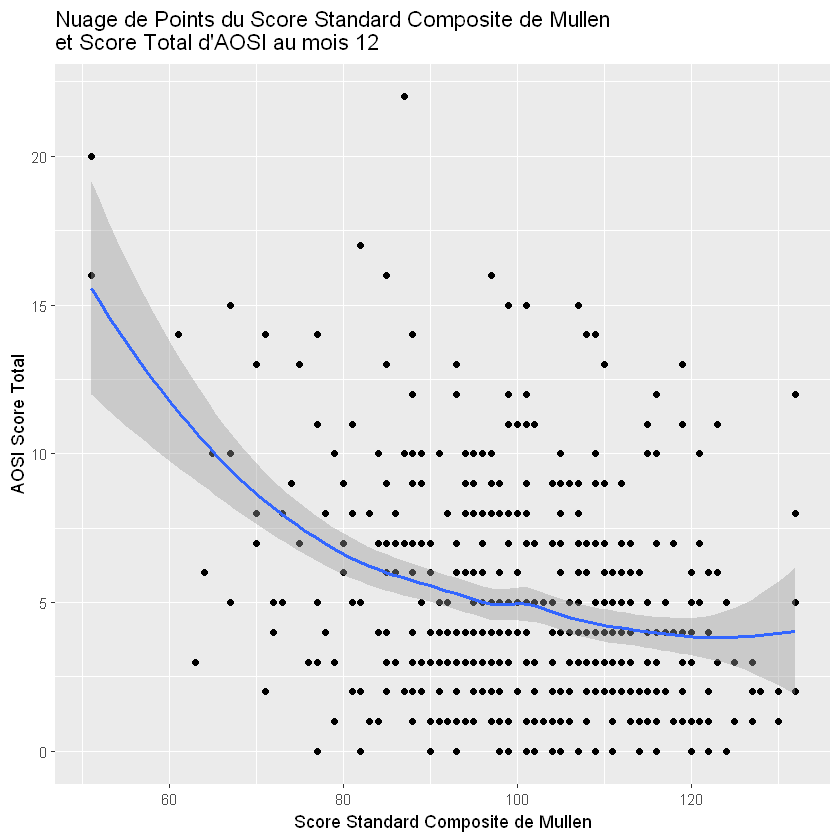

In [61]:
ggplot(data = data_complete, aes(x=V12.mullen.composite_standard_score, y=V12.aosi.total_score_1_18))+
    geom_point()+
    geom_smooth(method="loess")+ # non-linear
    labs(x="Score Standard Composite de Mullen",
        y ="AOSI Score Total",
        title = "Nuage de Points du Score Standard Composite de Mullen\net Score Total d'AOSI au mois 12")

Pour vérifier **2)**, nous devons examiner les résidus pour les différents sujets et visualiser leur variance. Considérons l'Exemple 1 précédent, où le modèle était le suivant :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2Age+\varepsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

Laissons $\hat{\beta_0}, \hat{\beta_1},$ et $\hat{\beta_2}$ désigner les paramètres de régression estimés, et $\widehat{AOSI}$ désigner une valeur prédite de AOSI. Une façon de prédire AOSI à partir de notre modèle est la suivante :

$$\widehat{AOSI}=\hat{\beta_0}+\hat{\beta_1}Mullen+\hat{\beta_2}Age$$

que nous désignons comme la **valeur ajustée** pour AOSI. La différence entre la valeur prédite du sujet à partir du modèle et leur valeur observée à partir des données est désignée par :

$$\hat{\varepsilon}=AOSI-\widehat{AOSI}$$

et représente "l'erreur" de notre modèle, souvent appelée le **résidu**.

Pour vérifier **2)**, nous avons besoin d'un nuage de points de chaque résidu du sujet par leur valeur ajustée, et d'observer leur variance dans le graphique. Pour accéder aux résidus, nous pouvons utiliser l'objet créé par `lm()`, l'un des composants stockés est un vecteur des résidus. De même, les valeurs ajustées peuvent également être extraites de cet objet. Dans l'exemple ci-dessous, un ensemble de données contenant ces résidus et valeurs ajustées est créé à l'aide de la fonction **`data.frame()`**. Lorsqu'on lui donne un ensemble de vecteurs, cette fonction créera un data frame avec ces vecteurs comme colonnes/variables. Ensuite, `ggplot2` peut être utilisé pour tracer les résidus par les valeurs ajustées.


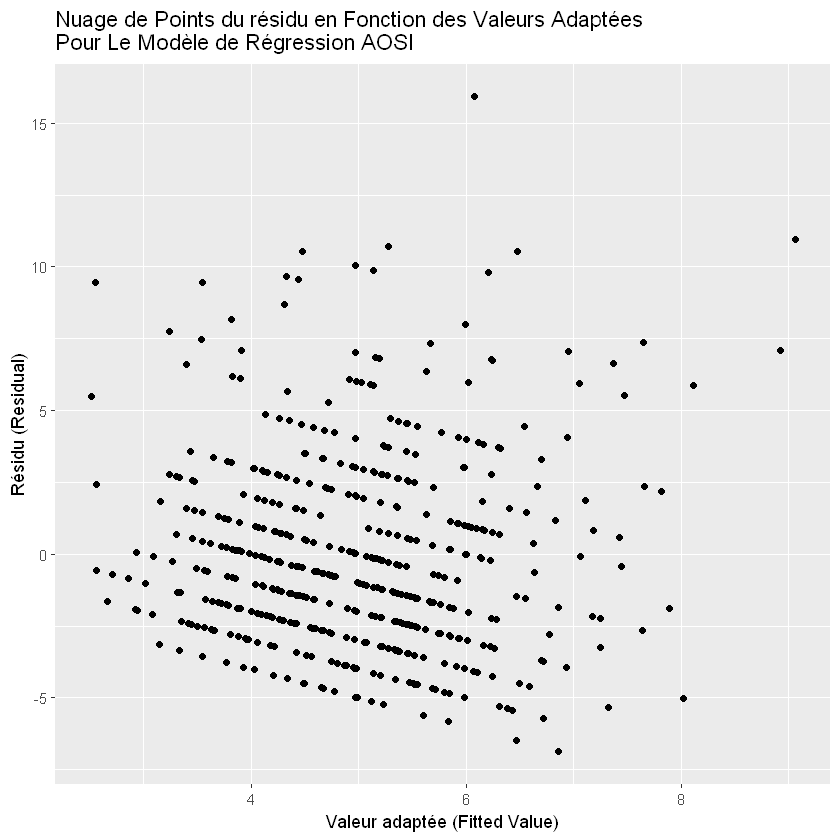

In [62]:
fit <- lm(V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score+V12.mullen.Candidate_Age,
         data = data_complete)

fit_data <- data.frame(fit$residuals, fit$fitted.values)

ggplot(data=fit_data, aes(y=fit.residuals, x=fit.fitted.values))+
    geom_point()+
    labs(x="Valeur adaptée (Fitted Value)",
        y="Résidu (Residual)",
        title="Nuage de Points du résidu en Fonction des Valeurs Adaptées \nPour Le Modèle de Régression AOSI")

Pour vérifier les hypothèses (assumptions) du modèle, nous cherchons à ce que la dispersion des données soit constante le long de l'axe des x, essentiellement, nous voulons que la variance des résidus soit constante sur toutes les valeurs ajustées. Plus explicitement, nous aimerions un graphique similaire au Cas 1 dans l'image ci-dessous, pour le Cas 2, la variance des résidus est plus élevée dans la plage médiane des valeurs ajustées.

![alt](trace_de_diagnostics.jpg)


Pour vérifier **3),** nous devons visualiser la distribution des résidus et la comparer à une distribution normale. Cela se fait généralement en créant un **graphique quantile-quantile (QQ plot) des résidus.** Idéalement, les points de données devraient se situer directement sur la ligne à 45 degrés fournie dans le graphique, tout écart par rapport à cette ligne indique une certaine déviation par rapport à la distribution normale. Souvent, les queues inférieure et supérieure des données dévieront de la ligne.


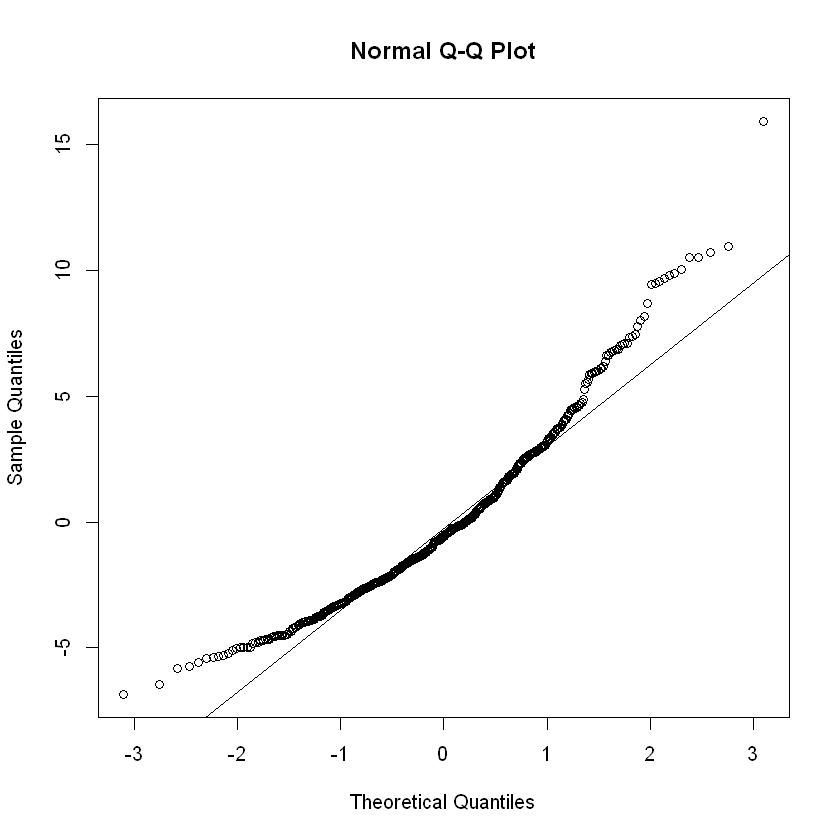

In [63]:
qqnorm(y = fit_data$fit.residuals)
qqline(y=fit_data$fit.residuals, datax = FALSE)

Dans l'exemple du score total de l'AOSI par le score composite de Mullen, la section médiane des points de données tombe sur la ligne ou très proche de celle-ci tandis qu'il y a une déviation notable aux extrémités supérieure et inférieure. La taille de cette déviation peut être préoccupante, cependant, en raison de la grande taille de l'échantillon (environ 500 sujets), une approximation à la distribution normale pour un grand échantillon peut être utilisée. Par conséquent, la déviation aux extrémités n'invalide pas le modèle de régression utilisé.

<a id="6"></a>

### 1.2.4) ANOVA et ANCOVA

Une des analyses statistiques les plus courantes est l'**ANOVA.** Nous avons déjà discuté de cette méthode d'analyse dans [Les Concepts Statistiques Fondamentaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Les%20Concepts%20Statistiques%20Fondamentaux%20dans%20R). Ici, nous montrons comment l'ANOVA est équivalente à un cas spécifique de régression linéaire. Nous définissons également et discutons de l'**ANCOVA.** Notons que l'ANCOVA est définie différemment selon certaines disciplines scientifiques, la définition utilisée ici est courante en statistique. Le message principal de cette section est que l'ANOVA et l'ANCOVA ne sont que des cas spéciaux d'un modèle de régression linéaire.

* <span style="color:blue"><u>**Pour l'ANOVA**</u></span> **:**

Nous avons des observations de deux groupes ou plus. Par exemple, supposons que nous souhaitons comparer le score total de l'AOSI à 12 mois selon le groupe de diagnostic à 24 mois. Supposons que les catégories de groupe de diagnostic sont : Risque élevé : ASD négatif (HR:ASD Negative), Risque élevé : ASD positif (HR:ASD Positive), Risque faible : ASD positif (LR:ASD Positive) et Risque faible : ASD négatif (LR:ASD Negative). 

In [31]:
unique(data_complete$GROUP)

[1] "HR_ASD" "HR_neg" "LR_neg" "LR_ASD"

Nous voulons comparer les moyennes des scores composites de Mullen à 24 mois entre ces groupes. Considérons le modèle de régression linéaire suivant :

$$AOSI=\beta_0+\beta_1LRneg+\beta_2HRasd+\beta_3HRneg+\epsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

où $LRneg, HRasd$ et $HRneg$ sont les variables factices (dummy variables) définies dans l'exemple 2 ci-dessus.

À partir de ce modèle, nous pouvons écrire les moyennes des scores AOSI pour chaque groupe en définissant la variable factice à 1 pour ce groupe et les autres à 0 (rappel : le groupe de référence pour ce modèle est Risque faible : ASD positif `LR_ASD`).


$\mbox{E}(AOSI|\mbox{LR:ASD Positive})=\beta_0$ (toutes les variables factices = 0)

$\mbox{E}(AOSI|\mbox{LR:ASD Negative})=\beta_0+\beta_1$

$\mbox{E}(AOSI|\mbox{HR:ASD Positive})=\beta_0+\beta_2$

$\mbox{E}(AOSI|\mbox{HR:ASD Negative})=\beta_0+\beta_3$

Nous pouvons voir que si nous voulons comparer les moyennes entre "LR : ASD Négatif" et "LR : ASD Positif" (référence), nous comparons $\beta_0+\beta_1-(\beta_0)=\beta_1$ à 0. Si $\beta_1=0$, alors les moyennes des deux groupes sont égales, sinon elles sont différentes. De même, pour comparer "HR : ASD Positif" et "LR : ASD Positif" (référence), nous comparons $\beta_2$ à 0 et pour comparer HR : ASD Négatif et LR : ASD Positif (référence), nous comparons $\beta_3$ à 0.

En fait, chaque comparaison de groupe par paire consiste à comparer l'un des $\beta_1, \beta_2$ et $\beta_3$ à 0. De plus, nous pouvons voir à partir des quatre moyennes ci-dessus que si tous les groupes ont la même moyenne, $\beta_1=\beta_2=\beta_3=0$. C'est exactement le même cadre que l'ANOVA, à partir de ce modèle de régression linéaire, nous pouvons comparer toutes les moyennes des groupes, ainsi que toutes les comparaisons par paires.

Rappelons-nous que nous supposons que les résidus de chaque sujet sont indépendants et que chaque résidu suit une distribution normale avec la même variance. **Ces hypothèses (assumptions) sont les mêmes que celles de l'ANOVA : observations indépendantes, distribution normale et variance égale entre les groupes (homoscédasticité).**

Enfin, rappelons que dans l'ANOVA, le **test global pour des moyennes égales utilise une distribution $F$ et que les tests par paires utilisent une distribution $T$.** C'est la même chose que dans le modèle de régression ci-dessus. Puisque tester $\beta_1=\beta_2=\beta_3=0$ teste plusieurs paramètres de régression, nous avons appris que le test utilise une distribution $F.$ Comme discuté précédemment, il s'avère que tester si un seul coefficient de régression est égal à $0$ utilise une distribution $T.$

![alt](F_distribution.jpg)

Nous pouvons voir l'égalité entre l'ANOVA et le modèle de régression ci-dessus en exécutant les deux analyses dans R. Lors de l'exécution d'une régression linéaire, pour tester l'hypothèse nulle de :

$$H_{0} : \beta_1=\beta_2=\beta_3=0$$

nous obtenons une valeur de statistique de test de 16.68 qui suit une distribution $F$ avec 3 et 599 degrés de liberté. Lors de l'exécution de l'ANOVA, nous voyons que la statistique de test correspondante est exactement la même.

In [32]:
# Regression
lm_V_ANOVA_fit <- lm(V12.aosi.total_score_1_18 ~ GROUP,
                         data = data_complete_2)

F_test_fit_lm_V_ANOVA <- aov(lm_V_ANOVA_fit)

summary(F_test_fit_lm_V_ANOVA)

             Df Sum Sq Mean Sq F value   Pr(>F)    
GROUP         3    599  199.81   16.68 2.39e-10 ***
Residuals   508   6086   11.98                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
75 observations deleted due to missingness

In [33]:
# ANOVA

ANOVA_fit <- aov(V12.aosi.total_score_1_18 ~ GROUP, data= data_complete_2)

summary(ANOVA_fit)

             Df Sum Sq Mean Sq F value   Pr(>F)    
GROUP         3    599  199.81   16.68 2.39e-10 ***
Residuals   508   6086   11.98                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
75 observations deleted due to missingness

Pour conclure la section sur la régression linéaire, discutons de l'ANCOVA.

* <span style="color:blue"><u>**Pour l'ANCOVA**</u></span> **:**

Dans une analyse ANCOVA, nous avons une variable de résultat $Y$, un prédicteur catégorique $X$ et un prédicteur continu $Z$. Le modèle ANCOVA est le suivant :

$$Y=\beta_0+\beta_1X+\beta_2Z+\beta_3X*Z+\varepsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

où $X*Z$ est appelé un **terme d'interaction**. Explorons ce modèle. Supposons que $X$ prenne l'une des deux catégories 0 ou 1. 

Pour ceux avec $X=0$, leur modèle est :

$$Y=\beta_0+\beta_2Z+\varepsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants. Puisque $Z$ est continu, nous pouvons voir que les sujets de cette catégorie ont une intercept de $\beta_0$ et une pente de $\beta_2$. 

Pour ceux avec $X=1$, leur modèle est :

$$Y=\beta_0+\beta_1+\beta_2Z+\beta_3Z+\varepsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants. Nous pouvons voir que leur intercept est $\beta_0+\beta_1$ et leur pente est $\beta_2+\beta_3$.

Ainsi, avec ANCOVA, nous permettons une relation linéaire différente entre $Y$ et $Z$ dans notre modèle, en fonction des valeurs de $X$. À titre d'exemple, considérons la modélisation d'un résultat du score total de l'AOSI à 12 mois (`V12.aosi.total_score_1_18`) avec un diagnostic ASD à 24 mois (positif ou négatif) (`SSM_ASD_v24`) et le score composite Mullen à 12 mois (`V12.mullen.composite_standard_score`) avec un modèle ANCOVA. Le modèle de régression linéaire correspondant est :

$$AOSI=\beta_0+\beta_1ASDpos+\beta_2Mullen+\beta_3ASDpos*Mullen+\varepsilon$$

$\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

Nous pouvons voir que la tendance (ou "pente") entre le score total de l'AOSI et le score composite de Mullen à 12 mois est $\beta_2$ pour les enfants ASD négatifs $(ASDpos=0)$ et $\beta_2+\beta_3$ pour les enfants ASD positifs $(ASDpos=1)$. Ensuite, ajustons ce modèle aux données.


In [34]:
unique(data_complete_2$SSM_ASD_v24)

[1] "YES_ASD" "NO_ASD"

In [35]:
# Regression
lm_ANCOVA_fit <- lm(V12.aosi.total_score_1_18 ~ SSM_ASD_v24 + V12.mullen.composite_standard_score + V12.mullen.composite_standard_score*SSM_ASD_v24,
                   data = data_complete_2)

summary(lm_ANCOVA_fit)


Call:
lm(formula = V12.aosi.total_score_1_18 ~ SSM_ASD_v24 + V12.mullen.composite_standard_score + 
    V12.mullen.composite_standard_score * SSM_ASD_v24, data = data_complete_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0012 -2.3956 -0.6443  1.9384 16.6981 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                             9.45201    1.31543
SSM_ASD_v24YES_ASD                                      9.65831    2.73602
V12.mullen.composite_standard_score                    -0.04770    0.01270
SSM_ASD_v24YES_ASD:V12.mullen.composite_standard_score -0.08101    0.02860
                                                       t value Pr(>|t|)    
(Intercept)                                              7.185  2.4e-12 ***
SSM_ASD_v24YES_ASD                                       3.530 0.000453 ***
V12.mullen.composite_standard_score                     -3.755 0.000193 ***
SSM_ASD_v24YES_ASD:V12.mullen.co

Nous constatons que tous les paramètres de régression sont hautement significatifs à partir de 0 en fonction des valeurs de $p$ et que le modèle ajusté est le suivant :

$$AOSI=9.45+9.66ASDpos-0.05Mullen-0.08ASDpos*Mullen+\varepsilon$$

Cela implique que les enfants ASD positifs ont une association légèrement plus négative entre l'AOSI et Mullen que les enfants ASD négatifs (en raison de l'estimation du terme d'interaction -0.08) et que les enfants ASD positifs ont une valeur de base de l'AOSI beaucoup plus élevée (la valeur de base étant lorsque le score composite Mullen est égal à 0). Nous pouvons mieux visualiser ces résultats en créant un nuage de points du score total de l'AOSI et du score composite de Mullen à 12 mois, avec une ligne de "meilleure ajustement" (best fit) séparée pour chaque diagnostic ASD.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


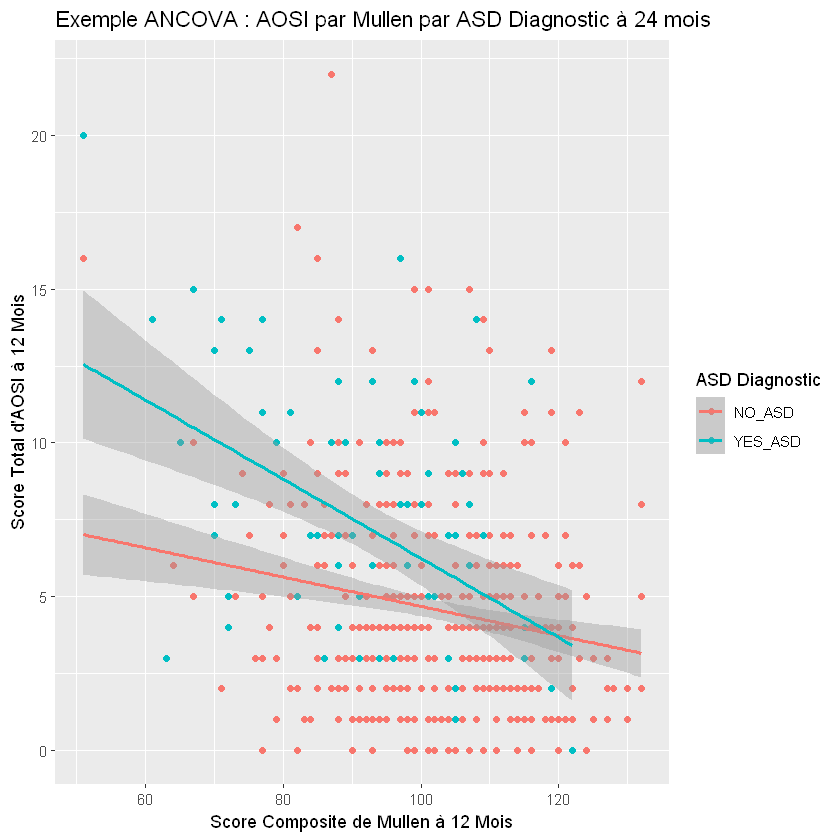

In [36]:
ggplot(mapping = aes(x = V12.mullen.composite_standard_score, 
                   y = V12.aosi.total_score_1_18,
                   group = SSM_ASD_v24, 
                   color = SSM_ASD_v24),
      data = data_complete_2)+
    geom_point()+
    geom_smooth(method="lm")+  # linear
    labs(x="Score Composite de Mullen à 12 Mois",
        y = "Score Total d'AOSI à 12 Mois",
        title = "Exemple ANCOVA : AOSI par Mullen par ASD Diagnostic à 24 mois",
        color = "ASD Diagnostic")
    

La légende est créée par l'argument `color=`, on utilise donc l'argument `color=` dans `labs()` pour changer le titre prêté.

<a id="02"></a>
# 2) Régression Logistique

**A continuer...**